In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式

/data/users/gaoli/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 数据

In [2]:
# 数据
data_name = ['Benign Traffic', 'Malicious Traffic', 
             'Evading Malicious Traffic(Insert overhead:50\%)', 'Evading Malicious Traffic(delay 50\%)', 
             'Evading Malicious Traffic(padding 50\%)', 'Evading Malicious Traffic(mixed)']
# white

data1 = [[ 0.1, 0.9,  0.7 ,  0.7,  0.5 ,0.9, 0.8 ,1, 0.8, 0.9],
         [ 0.2, 0.8,  0.7,  0.7 ,0.4, 0.9, 0.3,  0.8 , 0.3,  0.1],
         [ 0.3 ,0.7,  0.6, 0.3, 0.4,   0.5,  0.7, 1. , .5,  0.8],       
         [ 0.9,  0.6,  0.5, 0.5, 0.5, 0.1, 1.,  0.9,  0.2, 0.4],
         [-0.2,  -0.2,  -0.1, 0.1, -0.2,  0.8, 0.8, 0.8,  0.9, -0.3]]
# black
data2 = [[ 0.1,  -0.3, -0.4, -0.5, -0.9,  -0.2, -0.8 , -0.5, -0. ,  0.7],
        [ 0.2, -0.3 , -0.2 , 0.3 ,-0.9 , -0.9 ,-0.4,  -0.2, -0.8, -0.9],
        [0.3, -0.8 ,-0.1 ,-0.8 ,-0.5 ,-0.1 , -0.6,  -0.5, -0.7 , 0.3],
        [ 0.3,  0.7 , 0.4 , 0.  ,-0.8 ,-0.6,-0.,   -0.9, -0.6,  0.3],
        [-0.3 , 0.8, -0.4 , 0.5 ,-0.7, -0.4 ,-0.4,  0.7, -0.7, -0. ]]

data2_evasion1 = [[ 0.1,  -0.3, -0.4, -0.5, -0.9,  -0.2, -0.8 , -0.5, -0. ,  0.7],
        [ 0.2, -0.3 , -0.2 , 0.3 ,-0.9 , -0.9 ,-0.4,  -0.2, -0.8, -0.9],
        [0.3, -0.8 , 0.3, 0.4, -0.1 ,-0.8 ,-0.5 ,-0.1 , -0.6,  -0.5 ],#0.3, 0.4, 插入第2-3位置
        [ 0.3,  0.7 , 0.4 , 0.  ,-0.8 ,-0.6,-0.,   -0.9, -0.6,  0.3],
        [-0.3 , 0.8, -0.4 , 0.5 ,-0.7, -0.4 ,-0.4,  0.7, -0.7, -0. ]]

data2_evasion2 = [[ 0.1,  -0.3, -0.4, -0.5, -0.9,  -0.2, -0.8 , -0.5, -0. ,  0.7],
        [ 0.2, -0.3 , -0.2 , 0.3 ,-0.9 , -0.9 ,-0.4,  -0.2, -0.8, -0.9],
        [0.2, -0.1 ,-0.3 ,-0.2 ,-0.4 ,-0.1 , -0.6,  -0.5, -0.7 , 0.3],# delay0-5 
        [ 0.3,  0.7 , 0.4 , 0.  ,-0.8 ,-0.6,-0.,   -0.9, -0.6,  0.3],
        [-0.3 , 0.8, -0.4 , 0.5 ,-0.7, -0.4 ,-0.4,  0.7, -0.7, -0. ]]


data2_evasion3 = [[ 0.1,  -0.3, -0.4, -0.5, -0.9,  -0.2, -0.8 , -0.5, -0. ,  0.7],
        [ 0.2, -0.3 , -0.2 , 0.3 ,-0.9 , -0.9 ,-0.4,  -0.2, -0.8, -0.9],
        [0.5, 0 ,-0.1 ,0 ,0.5 ,-0.1 , -0.6,  -0.5, -0.7 , 0.3],# padding 0-5
        [ 0.3,  0.7 , 0.4 , 0.  ,-0.8 ,-0.6,-0.,   -0.9, -0.6,  0.3],
        [-0.3 , 0.8, -0.4 , 0.5 ,-0.7, -0.4 ,-0.4,  0.7, -0.7, -0. ]]

# TODO：收集 混合策略的data
data2_evasion4 = [[ 0.1,  -0.3, -0.4, -0.5, -0.9,  -0.2, -0.8 , -0.5, -0. ,  0.7], 
        [ 0.2, -0.3 , -0.2 , 0.3 ,-0.9 , -0.9 ,-0.4,  -0.2, -0.8, -0.9],
        [0.5, 0 ,-0.1 ,0 ,0.5 ,-0.1 , -0.6,  -0.5, -0.7 , 0.3],# padding 0-5
        [ 0.3,  0.7 , 0.4 , 0.  ,-0.8 ,-0.6,-0.,   -0.9, -0.6,  0.3],
        [-0.3 , 0.8, -0.4 , 0.5 ,-0.7, -0.4 ,-0.4,  0.7, -0.7, -0. ]]
print(data1)
# data2 =  np.round(np.random.uniform(-1, 1, size=(5, 10)), 1)
print(data2)

[[0.1, 0.9, 0.7, 0.7, 0.5, 0.9, 0.8, 1, 0.8, 0.9], [0.2, 0.8, 0.7, 0.7, 0.4, 0.9, 0.3, 0.8, 0.3, 0.1], [0.3, 0.7, 0.6, 0.3, 0.4, 0.5, 0.7, 1.0, 0.5, 0.8], [0.9, 0.6, 0.5, 0.5, 0.5, 0.1, 1.0, 0.9, 0.2, 0.4], [-0.2, -0.2, -0.1, 0.1, -0.2, 0.8, 0.8, 0.8, 0.9, -0.3]]
[[0.1, -0.3, -0.4, -0.5, -0.9, -0.2, -0.8, -0.5, -0.0, 0.7], [0.2, -0.3, -0.2, 0.3, -0.9, -0.9, -0.4, -0.2, -0.8, -0.9], [0.3, -0.8, -0.1, -0.8, -0.5, -0.1, -0.6, -0.5, -0.7, 0.3], [0.3, 0.7, 0.4, 0.0, -0.8, -0.6, -0.0, -0.9, -0.6, 0.3], [-0.3, 0.8, -0.4, 0.5, -0.7, -0.4, -0.4, 0.7, -0.7, -0.0]]


# 画图

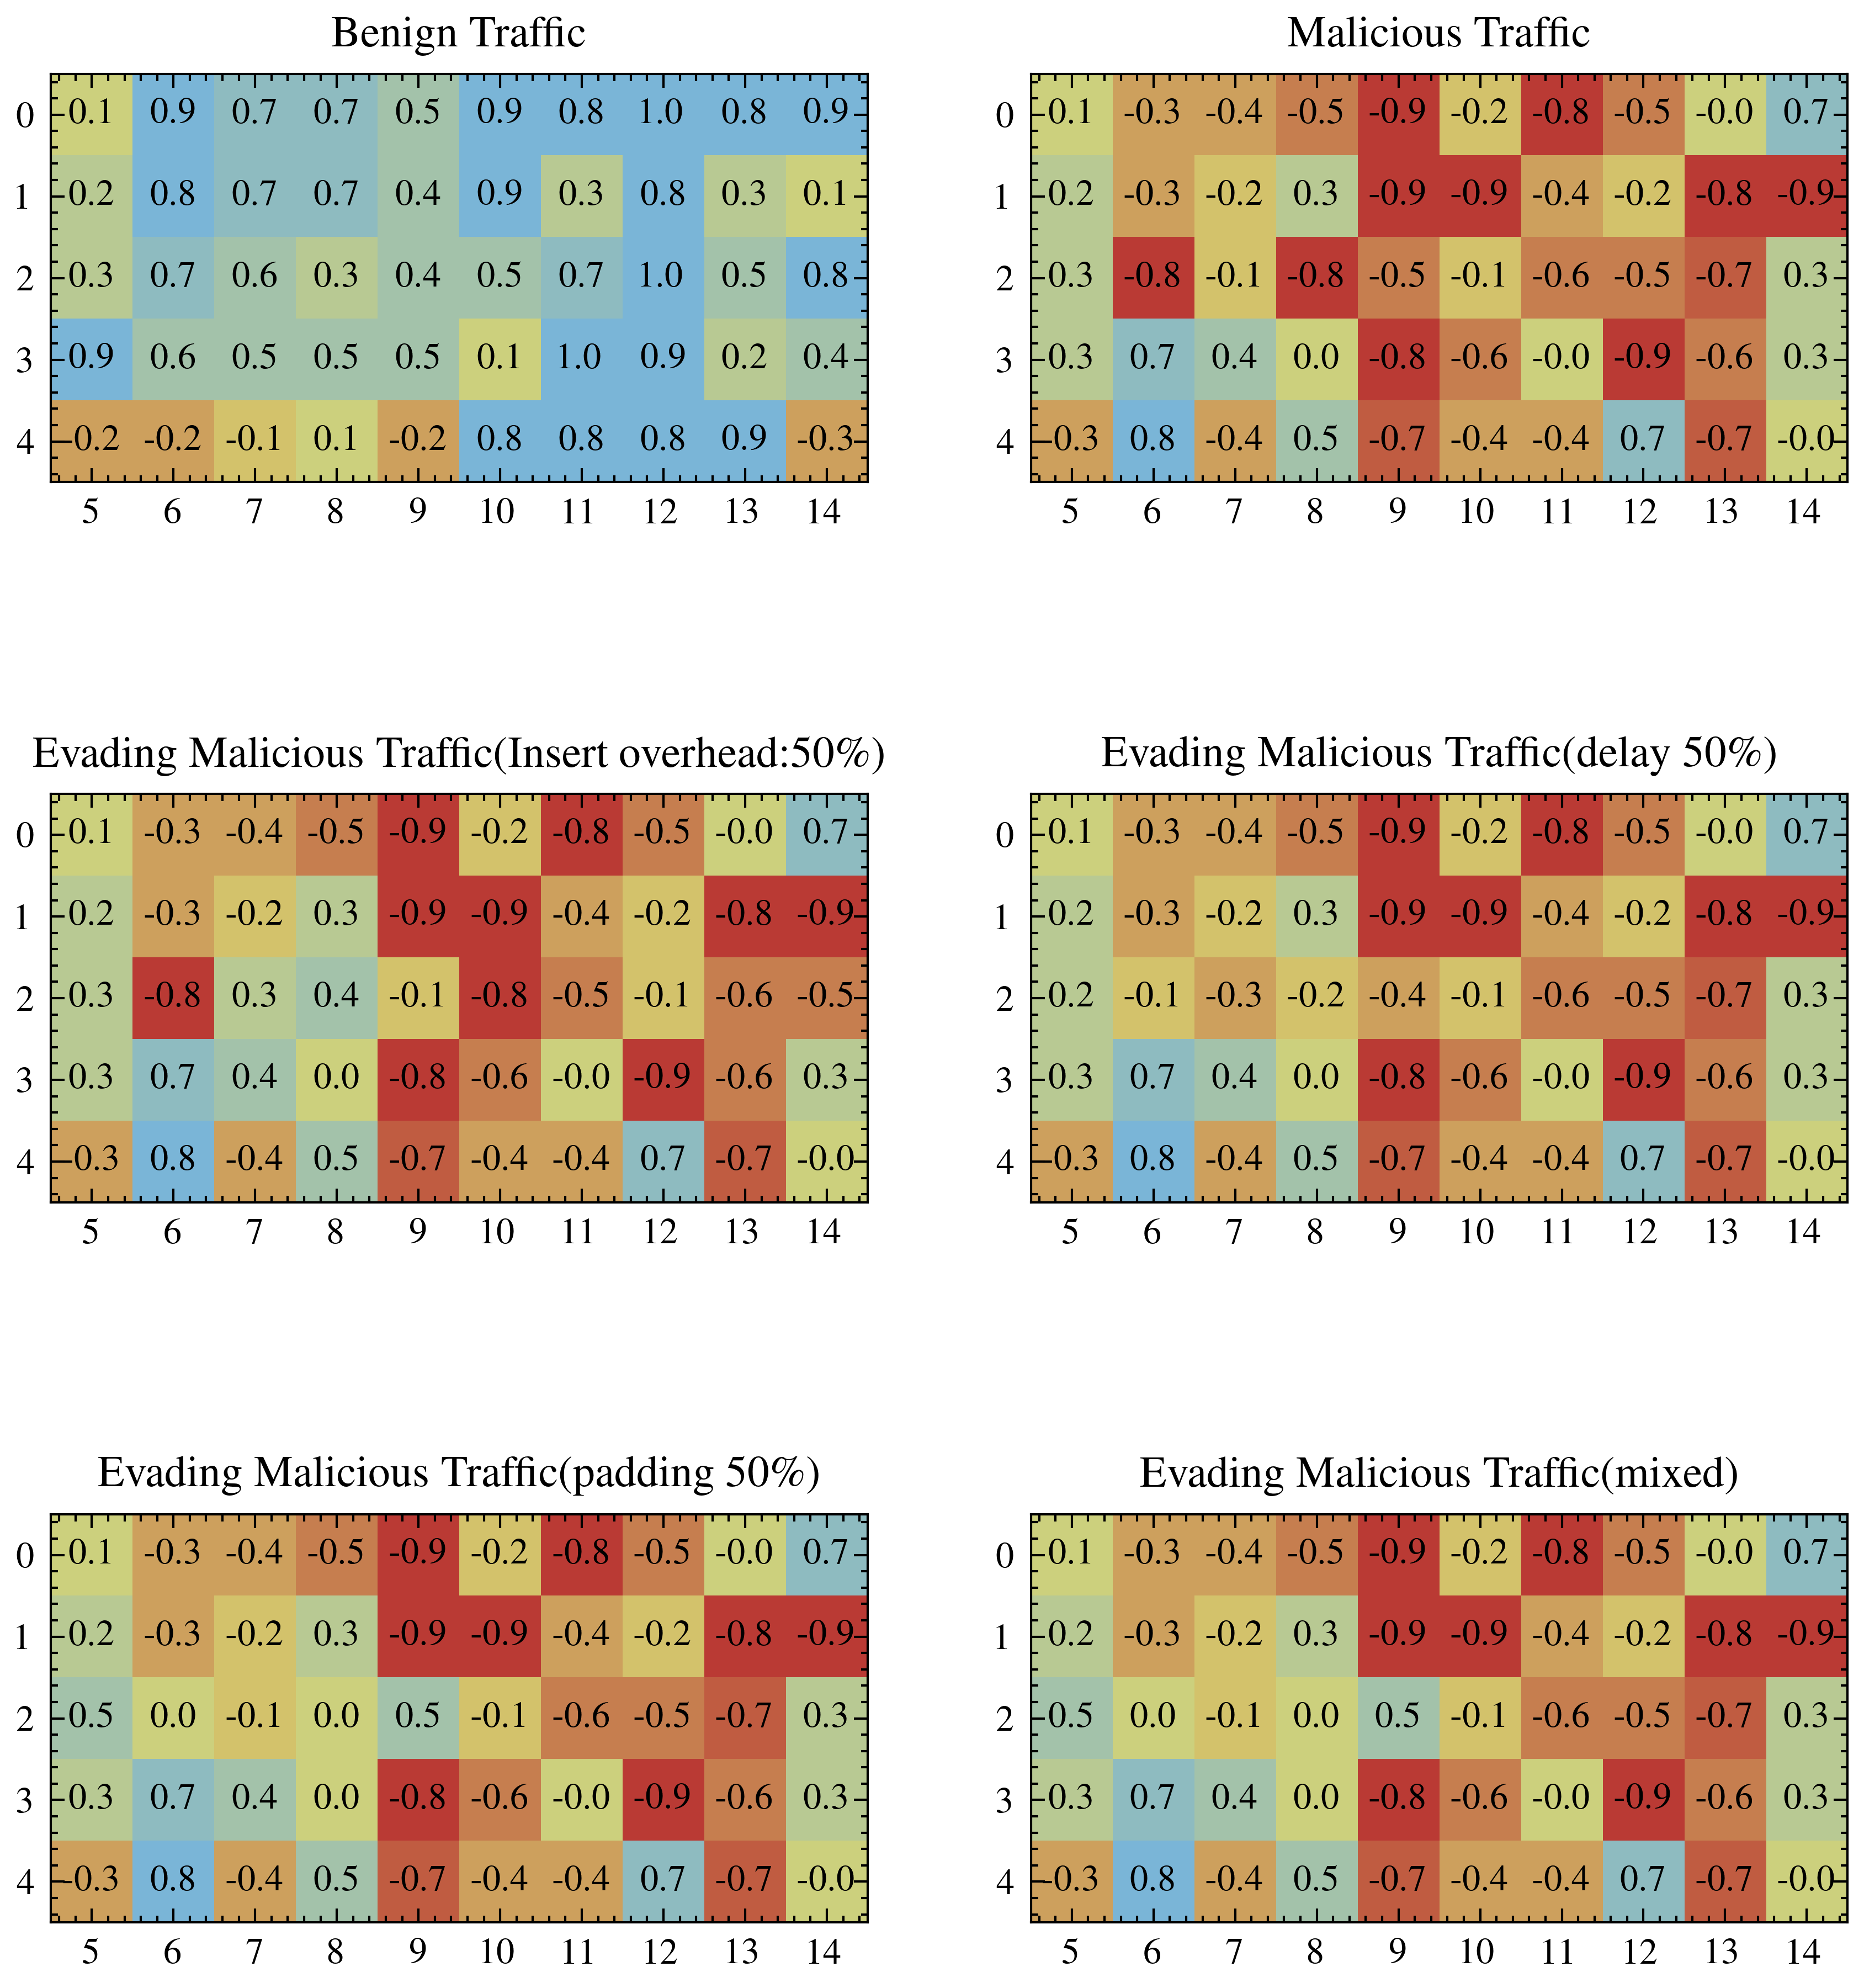

In [3]:

# 设置自定义颜色映射，接近1为蓝色，接近-1为红色，中间为黄色
colors = ['#BA3A34', '#d7d472', '#7AB5D7']  # 红、黄、蓝
from matplotlib.colors import LinearSegmentedColormap
# 创建颜色过渡
n_colors = 10
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_colors)

plt.figure(figsize=(7, 8)) # 设置画布大小 宽 和 高
figrows = 3
figcols = 2

# 第一个子图
plt.subplot(figrows, figcols, 1)  # 1 行 2 列，第一个子图
plt.imshow(data1, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
# 添加数值标签
matrix = np.array(data1)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=8)
# plt.colorbar() # 显示颜色刻度
plt.xticks(np.arange(10), np.arange(5,15)) # 将原下标0-10替换为新下标5-15
plt.title(data_name[0])


# 第2个子图
plt.subplot(figrows, figcols, 2)  # 1 行 2 列，第一个子图
plt.imshow(data2, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
# 添加数值标签
matrix = np.array(data2)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=8)
# plt.colorbar(label='Color Scale')  # 添加颜色刻度
plt.xticks(np.arange(10), np.arange(5,15)) # 将原下标0-10替换为新下标5-15
plt.title(data_name[1])

# 第3个子图
matrix =np.array(data2_evasion1)
plt.subplot(figrows, figcols, 3)  # 1 行 2 列，第一个子图
plt.imshow(matrix, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
# 添加数值标签
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=8)
# plt.colorbar() # plt.colorbar(label='Color Scale')  # 添加颜色刻度
plt.xticks(np.arange(10), np.arange(5,15)) # 将原下标0-10替换为新下标5-15
plt.title(data_name[2])


# 第4个子图
matrix =np.array(data2_evasion2)
plt.subplot(figrows, figcols, 4)  # 1 行 2 列，第一个子图
plt.imshow(matrix, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
# 添加数值标签
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=8)
# plt.colorbar() # plt.colorbar(label='Color Scale')  # 添加颜色刻度
plt.xticks(np.arange(10), np.arange(5,15)) # 将原下标0-10替换为新下标5-15
plt.title(data_name[3])

# 第5个子图
matrix =np.array(data2_evasion3)
plt.subplot(figrows, figcols, 5)  # 1 行 2 列，第一个子图
plt.imshow(matrix, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
# 添加数值标签
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=8)
# plt.colorbar() # plt.colorbar(label='Color Scale')  # 添加颜色刻度
plt.xticks(np.arange(10), np.arange(5,15)) # 将原下标0-10替换为新下标5-15
plt.title(data_name[4])

# 第6个子图
matrix =np.array(data2_evasion4)
plt.subplot(figrows, figcols, 6)  # 1 行 2 列，第一个子图
plt.imshow(matrix, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
# 添加数值标签
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=8)
# plt.colorbar() # plt.colorbar(label='Color Scale')  # 添加颜色刻度
plt.xticks(np.arange(10), np.arange(5,15)) # 将原下标0-10替换为新下标5-15
plt.title(data_name[5])
### show ###
plt.show()


[(0.7294117647058823, 0.22745098039215686, 0.20392156862745098, 1.0), (0.7546840958605664, 0.3616557734204793, 0.2579520697167756, 1.0), (0.7799564270152505, 0.4958605664488017, 0.3119825708061002, 1.0), (0.8052287581699347, 0.6300653594771242, 0.36601307189542487, 1.0), (0.8305010893246187, 0.7642701525054466, 0.4200435729847495, 1.0), (0.8026143790849674, 0.8178649237472767, 0.49106753812636167, 1.0), (0.7215686274509804, 0.7908496732026145, 0.5790849673202614, 1.0), (0.6405228758169935, 0.7638344226579521, 0.6671023965141611, 1.0), (0.5594771241830065, 0.7368191721132897, 0.755119825708061, 1.0), (0.47843137254901963, 0.7098039215686275, 0.8431372549019608, 1.0)]


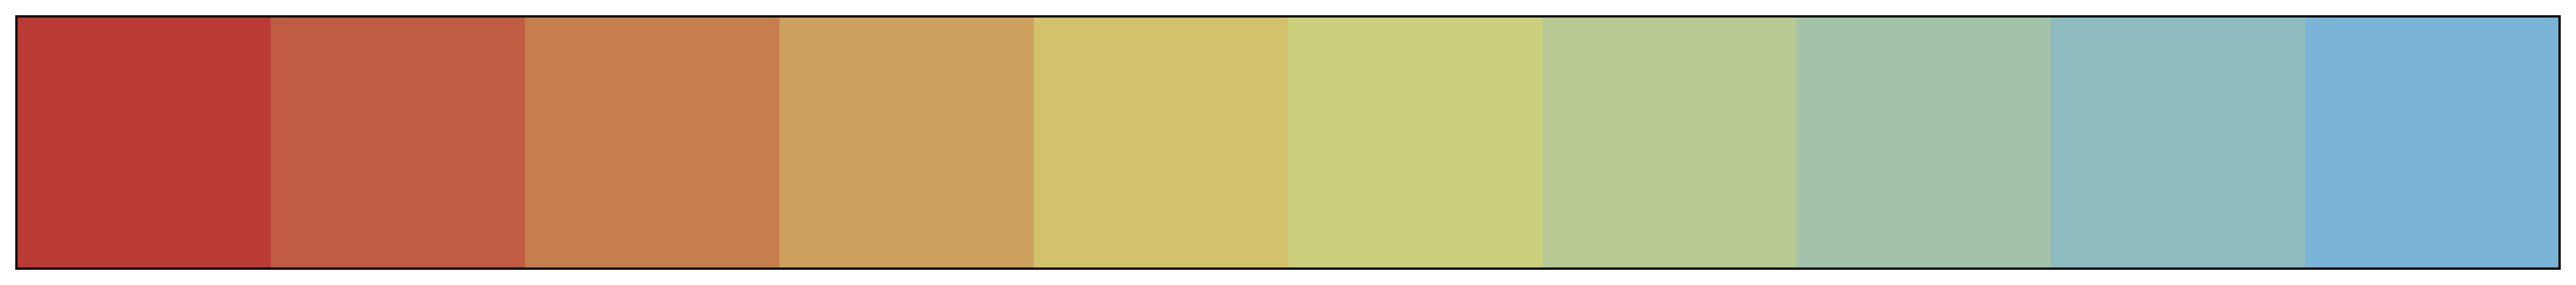

In [41]:
# 根据自己预先设定的n个颜色，生成过渡颜色bar（包含N个颜色）
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 定义三种颜色
colors = ['#BA3A34', '#d7d472', '#7AB5D7']

# 创建颜色过渡
n_colors = 10
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_colors)

# 生成过渡色的列表
transition_colors = [cmap(i) for i in range(n_colors)]
print(transition_colors)
# 显示过渡色
fig, ax = plt.subplots(1, 1, figsize=(10, 1))
ax.imshow([transition_colors], aspect='auto', cmap=cmap)
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式

/data/users/gaoli/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.DataFrame(columns=['1', '2','3','4','5'])

# 实时性
n,m     
2,20:   
2,25: 0.4386723041534424    
2,30: 0.125108003616333 

In [20]:
# 5, 10, 15, 20, 25, 30 ,35, 40 , 45, 50
df.loc[0] = [ 0.0046923160552978516, 0.011232376098632812, 0.019605746636023887, 0.01922815375857883,  0.0379085748091987]
# 5, 10, 15, 20,25
df.loc[1] = [ 0.015403985977172852,0.0745518340004815,  0.0710772338666414,  0.2963897429014507,0.4292519688606262]
# 5
df.loc[2] = [0.02460345855126014,0.12139815092086792,  0.18125967646754065, 0.7068260784806877,1.2769214976323795]
df.loc[3] = [ 0.06196709473927816,  0.12915818314803273,  0.33487100436769685,0.75413703096324, 2.243585569517953]
# df.loc[4] = [0.2,  0.2,  0.1, 0.1, 0.2,  0.8, 0.8, 0.8,  0.9, 0.3]
df

,1,2,3,4,5
0,0.004692,0.011232,0.019606,0.019228,0.037909
1,0.015404,0.074552,0.071077,0.296390,0.429252
2,0.024603,0.121398,0.181260,0.706826,1.276921
3,0.061967,0.129158,0.334871,0.754137,2.243586


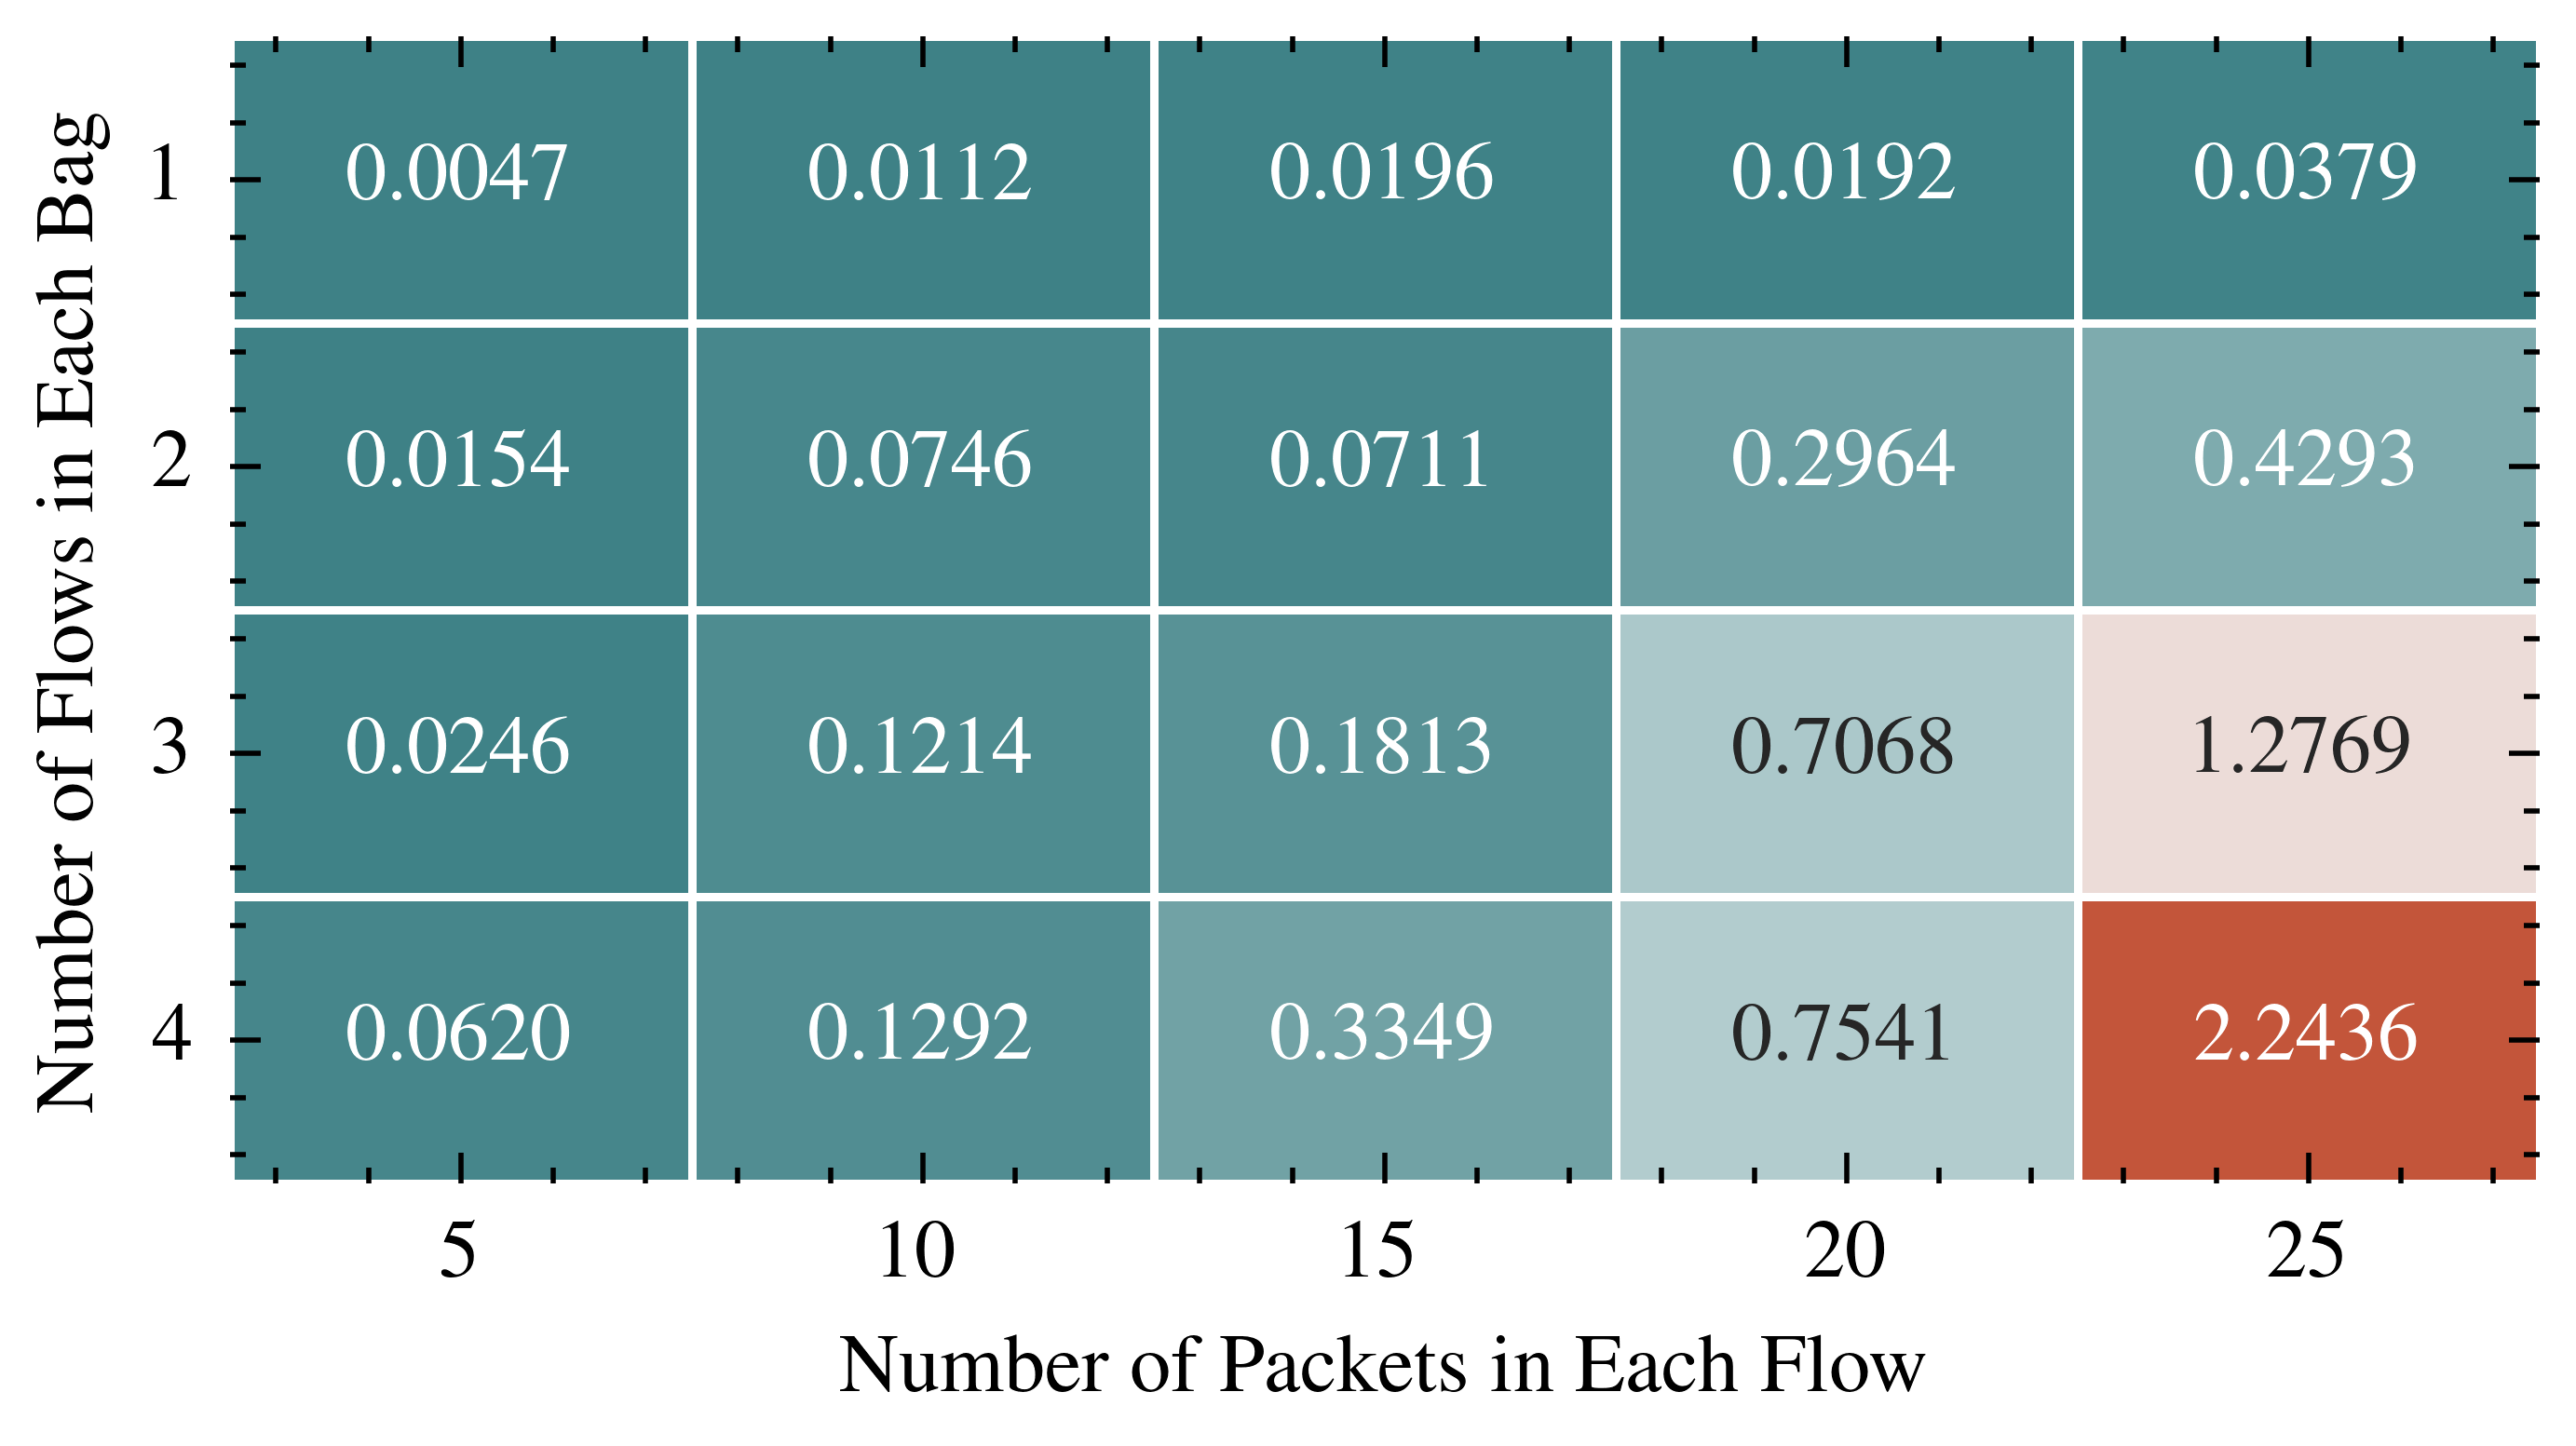

<Figure size 1980x1500 with 0 Axes>

In [23]:
plt.figure(figsize=(4,2),dpi=800)

heatmap = sns.heatmap(data=df,#矩阵数据集，数据的index和columns分别为heatmap的y轴方向和x轴方向标签   
            cmap=sns.diverging_palette(200, 20, n=200),#设置调色板            
         annot=True,annot_kws={'size': 8, 'weight': 'bold'},#将数值标签大小设置为10，颜色设置为黑色，数值粗细设置为黑色
         cbar=False,
         fmt=".4f", linewidths=.8)#设置标签大小、颜色、加粗})
heatmap.set_xlabel('Number of Packets in Each Flow')
heatmap.set_ylabel('Number of Flows in Each Bag')
# Adding custom x-axis ticks
heatmap.set_xticklabels([5, 10, 15, 20, 25], rotation=0)
heatmap.set_yticklabels([1, 2, 3, 4], rotation=0)
# plt.title('Prediction Latency(s)')
# 去除bar
plt.show()
plt.savefig('/data/users/gaoli/exp_Robust/figures/infertime_diff_bag.png')


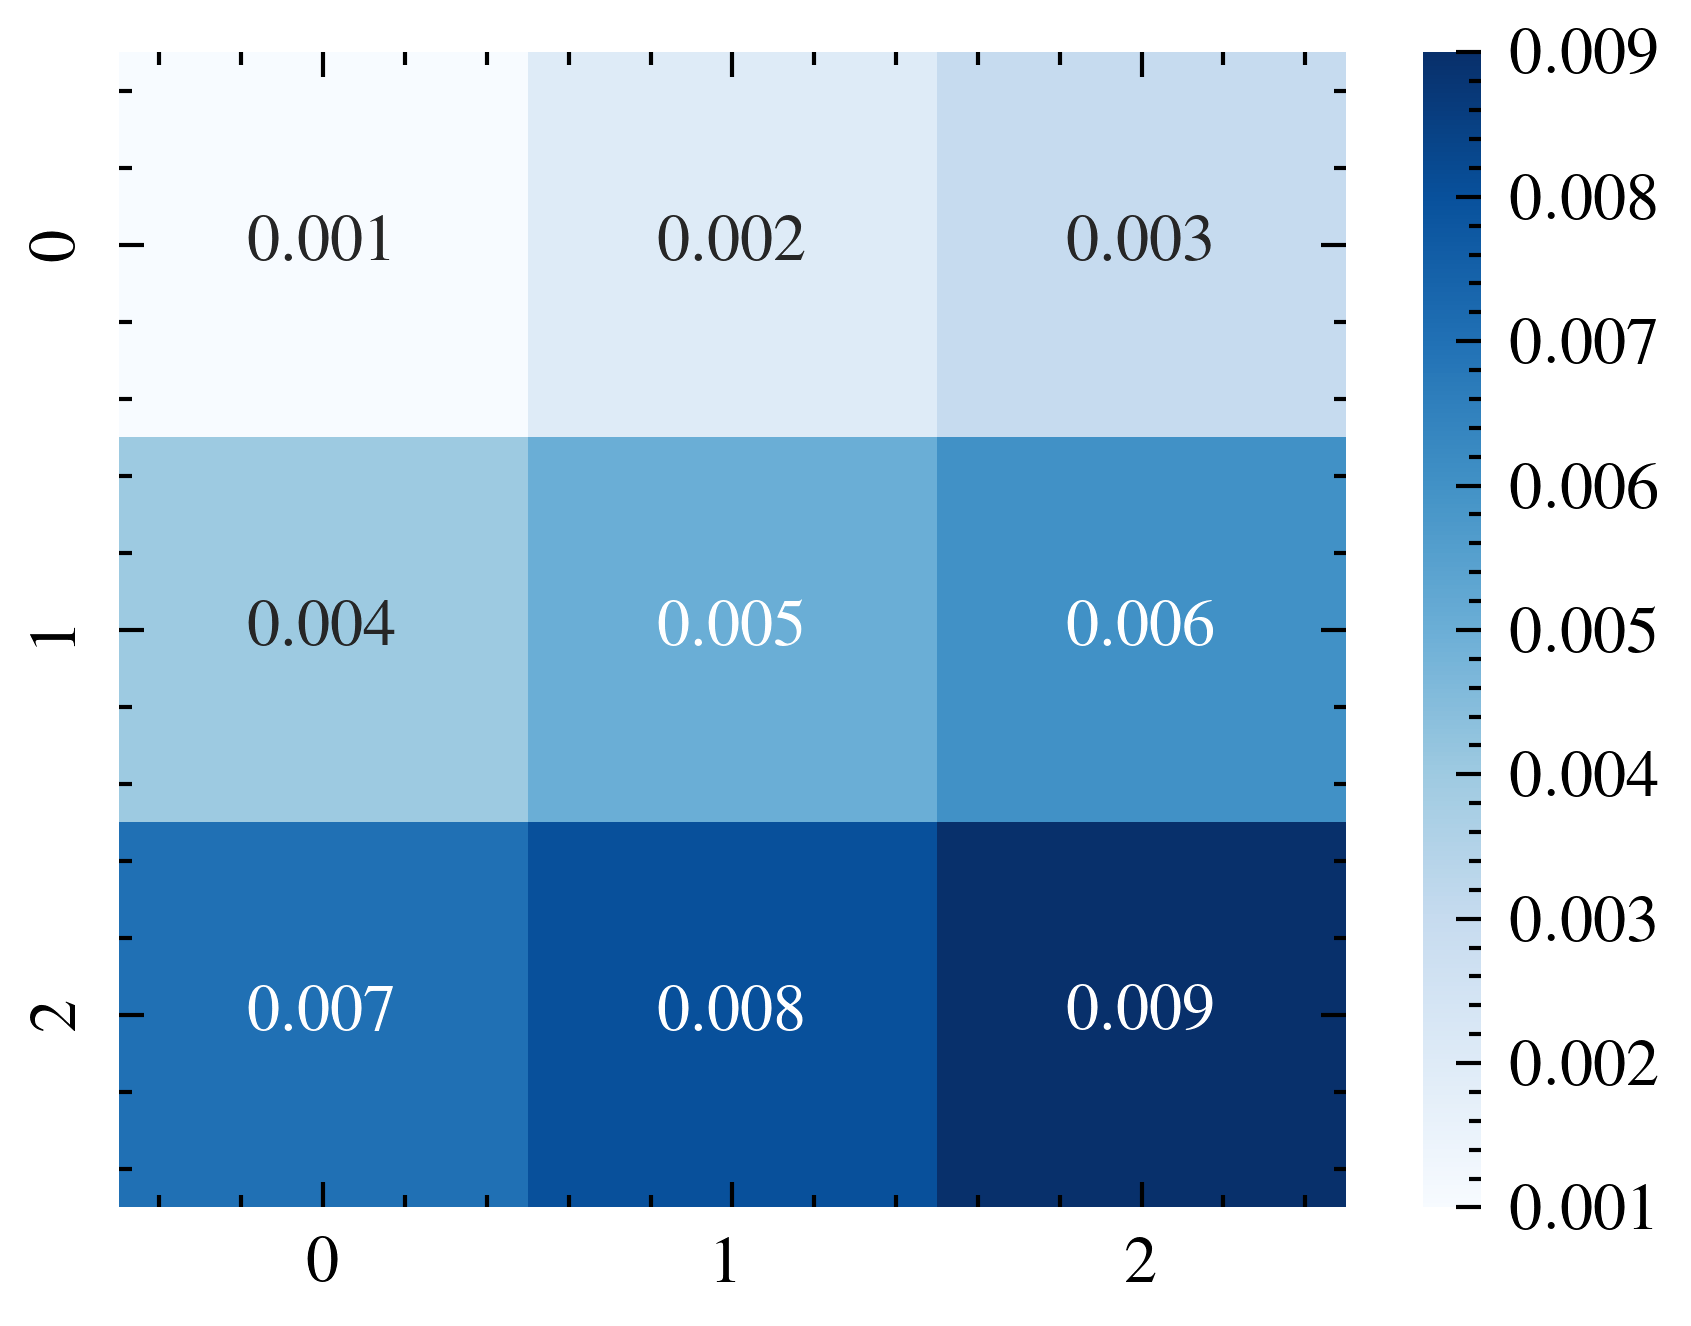

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = [[0.001, 0.002, 0.003],
        [0.004, 0.005, 0.006],
        [0.007, 0.008, 0.009]]

# 调整颜色映射
sns.heatmap(data, cmap="Blues", annot=True, fmt=".3f")

plt.show()
